In [6]:
import sys
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from few.trajectory.inspiral import EMRIInspiral
from few.waveform import GenerateEMRIWaveform
from few.summation.aakwave import AAKSummation
from few.waveform import Pn5AAKWaveform, AAKWaveformBase
from few.utils.utility import *

os.chdir("../")
path = os.getcwd()
sys.path.insert(0, path)
import GWGen
from GWGen.WFGenerator import *

# set initial parameters
M = 1e6
m = 1e1
mu = 2e-18
a = 0.9
p0 = 14.0
e0 = 0.2
iota0 = 0.1
Y0 = np.cos(iota0)
Phi_phi0 = 0.
Phi_theta0 =0.
Phi_r0 = 0.


qS = 0.2
phiS = 0.2
qK = 0.8
phiK = 0.8
dist = 1.0
mich = False
dt = 15.0
T = 2.0

alphaval = alphavalue(M,mu)
print(r"alpha = {0}".format(alphaval))

TabError: inconsistent use of tabs and spaces in indentation (Kludge.py, line 211)

# Without Proca

In [2]:
use_gpu = False

# keyword arguments for inspiral generator (RunKerrGenericPn5Inspiral)
inspiral_kwargs = {
    "DENSE_STEPPING": 1,  # we want a densely sampled trajectory
    "max_init_len": int(1e3),  # all of the trajectories will be well under len = 1000
}

# keyword arguments for summation generator (AAKSummation)
sum_kwargs = {
    "use_gpu": use_gpu,  # GPU is availabel for this type of summation
    "pad_output": False,
}

wfgenerator = EMRIWaveform(inspiral_kwargs=inspiral_kwargs, sum_kwargs=sum_kwargs, use_gpu=False)
withoutproca = wfgenerator(M, mu, a, p0, e0, Y0, qS, phiS, qK, phiK, dist,Phi_phi0=Phi_phi0, Phi_theta0=Phi_theta0, Phi_r0=Phi_r0, mich=mich, dt=dt, T=T)


/mnt/Data_Volume/Computer_Programs/Anaconda/envs/few_env/lib/python3.7/site-packages/few-1.4.6-py3.7-linux-x86_64.egg/few/summation/aakwave.py:228: UserWarning: Inclination trajectory includes values within 1e-6 of the poles. We shift these values automatically away from poles by 1e-6.
  "Inclination trajectory includes values within 1e-6 of the poles. We shift these values automatically away from poles by 1e-6."


# With Proca

In [2]:
use_gpu = False

# keyword arguments for inspiral generator (RunKerrGenericPn5Inspiral)
inspiral_kwargs = {
    "DENSE_STEPPING": 1,  # we want a densely sampled trajectory
    "max_init_len": int(1e3),  # all of the trajectories will be well under len = 1000
}

# keyword arguments for summation generator (AAKSummation)
sum_kwargs = {
    "use_gpu": use_gpu,  # GPU is availabel for this type of summation
    "pad_output": False,
}

wfgen = EMRIWithProcaWaveform()
withproca = wfgen(M,m,mu,a,p0,e0,Y0,T=T,qS=qS,phiS=phiS,qK=qK,phiK=phiK,dist=dist,mich=mich)

/mnt/Data_Volume/Computer_Programs/Anaconda/envs/few_env/lib/python3.7/site-packages/few-1.4.6-py3.7-linux-x86_64.egg/few/summation/aakwave.py:228: UserWarning: Inclination trajectory includes values within 1e-6 of the poles. We shift these values automatically away from poles by 1e-6.
  "Inclination trajectory includes values within 1e-6 of the poles. We shift these values automatically away from poles by 1e-6."


In [4]:
wfgen.Trajectory

{'t': array([0.00000000e+00, 2.99836745e-01, 3.29820420e+00, 3.32818787e+01,
        3.33118624e+02, 3.33148608e+03, 3.33151606e+04, 3.33151906e+05,
        3.33151936e+06, 9.64314931e+06, 1.59547793e+07, 2.22664092e+07,
        2.85780392e+07, 3.48896691e+07, 4.12012991e+07, 4.75129290e+07,
        5.38245590e+07, 6.01361889e+07, 6.31162995e+07]),
 'p': array([14.        , 14.        , 13.99999997, 13.99999972, 13.99999724,
        13.99997238, 13.99972382, 13.99723747, 13.97230127, 13.91937226,
        13.86583683, 13.8116788 , 13.75688129, 13.7014267 , 13.64529664,
        13.58847192, 13.53093246, 13.47265726, 13.44487997]),
 'e': array([0.2       , 0.2       , 0.2       , 0.19999999, 0.19999994,
        0.19999938, 0.19999377, 0.19993765, 0.19937511, 0.19818266,
        0.19697877, 0.19576314, 0.19453549, 0.19329551, 0.19204289,
        0.1907773 , 0.1894984 , 0.18820582, 0.18759066]),
 'Y': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]

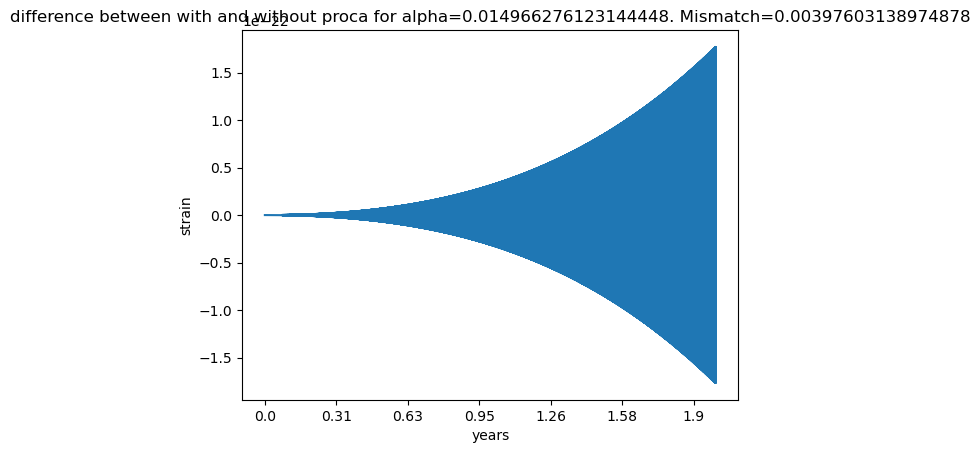

In [23]:
mismatch = get_mismatch(withoutproca, withproca)
tp = np.arange(len(withproca)) * dt;
twp = np.arange(len(withoutproca)) * dt
plt.plot(tp, withproca.real-withoutproca.real);
plt.title("difference between with and without proca for alpha={0}. Mismatch={1}".format(alphaval,mismatch));
ticks = plt.xticks()[0][1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*365))];
plt.xticks(ticks, newlabs);
plt.xlabel("years");
plt.ylabel("strain");

In [25]:
wfgenerator.create_waveform